In [1]:
#TO-DO Tasks
#Task1
time_data = [
 (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
 (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
 (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
 (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
 (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
 ]
low=[]
moderate=[]
high=[]

for data in time_data:
    study= data[0]
    if study < 3:
        low.append(study)
    elif study >= 3 and study <= 5:
        moderate.append(study)
    else:
        high.append(study)
print("Low (less than 3 hours):", low)
print("Moderate (between 3 to 5 hours):", moderate)
print("High (more than 5 hours):", high)

Low (less than 3 hours): [2.5, 1.5, 2.0, 2.5]
Moderate (between 3 to 5 hours): [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High (more than 5 hours): [5.5, 6.0]


In [2]:
#Task2
c1 = len(low)
c2 = len(moderate)
c3 = len(high)
print("The number of items in low study is ",c1,".")
print("The number of items in moderate study is ",c2,".")
print("The number of items in high study is ",c3,".")

The number of items in low study is  4 .
The number of items in moderate study is  9 .
The number of items in high study is  2 .


In [3]:
#Task3
study_minutes=[]
for data in time_data:
    study= data[0]
    study_minutes.append(data[0]*60)
print(study_minutes)

[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [4]:
#Task4
study_hours=[]
entertainment_hours=[]
sleep_hours=[]
for data in time_data:
    study_hours.append(data[0])
    entertainment_hours.append(data[1])
    sleep_hours.append(data[2])

avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("Average hours spent studying:", avg_study)
print("Average hours spent on entertainment:", avg_entertainment)
print("Average hours spent sleeping :", avg_sleep)

Average hours spent studying: 3.7
Average hours spent on entertainment: 2.5
Average hours spent sleeping : 7.166666666666667


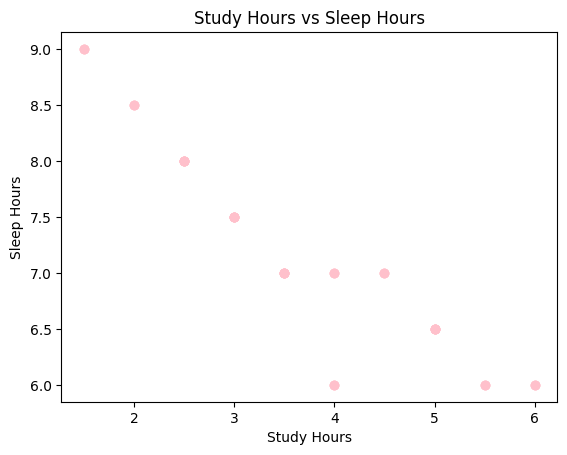

In [12]:
#Task5
import matplotlib.pyplot as plt
for data in time_data:
    study_hours.append(data[0])
    sleep_hours.append(data[2])

plt.scatter(study_hours, sleep_hours, color="pink")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study Hours vs Sleep Hours")
plt.show()


In [6]:
#Recursion Tasks
#Task1
def sum_nested_list(nested_list):
  '''
  Calculate the sum of all numbers in a nested list.
  This function takes a list that may contain integers and other nested lists.
  It recursively transverses the list and sums all the integers, no matter how deeply
  nested they are.
  Args:
      nested_list(list): A list that may contain integers or other list of integers.
  Returns:
      int: The total sum of all integers in the nested list, including those in sublists
  '''
  total = 0
  for element in nested_list:
    if isinstance(element, list): #check if element is a list
      total += sum_nested_list(element)
    else:
      total +=element #add number to the total
  return total
print("Total sum of all the numbers is ",sum_nested_list([1, [2, [3, 4], 5], 6, [7, 8]]))


Total sum of all the numbers is  36


In [7]:
#Task2
def generate_permutations(s):
    if len(s) <= 1:
        return [s]

    permutations = []
    used = set()

    for i in range(len(s)):
        char = s[i]
        if char in used:
            continue
        used.add(char)

        remaining = s[:i] + s[i+1:]

        for perm in generate_permutations(remaining):
            permutations.append(char + perm)

    return permutations
# Testing
print(generate_permutations("abc"))
print(generate_permutations("aab"))

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


In [8]:
#Task3
def calculate_directory_size(directory):
    total_size = 0

    for key, value in directory.items():
        if isinstance(value, dict):
            total_size += calculate_directory_size(value)
        else:
            total_size += value

    return total_size


# Testing
directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
         "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

print("Total directory size (KB):", calculate_directory_size(directory_structure))


Total directory size (KB): 1400


In [9]:
#Dyanamic Programming
#Task1
def min_coins(coins, amount):
  '''
   Finds the minimum number of coins needed to make up a given amount using dynamic
  programming.
  This function solves the coin change problem by determining the fewest number of
  coins from a given set of coin denominations that sum up to a target amount. The
  solution uses dynamic programming(tabulation) to iteratively build up the minimum
  number of coins required for each amount.
  Parameters:
  coins (list of int): A list of coin denominations available for making change. Each
  coin denomination is a positive integer.
  amount (int): The target amount for which we need to find the minimum number of coins
  . It must be a non-negative integer.
  Returns:
  int: The minimum number of coins required to make the given amount.
  If it is not possible to make the amount with the given coins, returns-1.
  Example:
  >>> min_coins([1, 2, 5], 11)
  3
  >>> min_coins([2], 3)-1
  '''
  dp = [float('inf')] * (amount + 1)
  dp[0] = 0
  for coin in coins:
    for i in range(coin, amount + 1):
      dp[i] = min(dp[i], dp[i-coin] + 1)
  return dp[amount] if dp[amount] != float('inf') else -1
#Testing
print(min_coins([1, 2, 5], 11))

3


In [10]:
#Task2
def longest_common_subsequence(s1, s2):
  dp = [[0 for j in range(len(s2) + 1)] for i in range(len(s1)+1)]
  for i in range(len(s1) -1, -1, -1):
    for j in range(len(s2) -1, -1, -1):
      if s1[i] == s2[j]:
        dp[i][j] = 1 + dp[i+1][j+1]
      else:
        dp[i][j] = max(dp[i+1][j], dp[i][j+1])
  return dp[0][0]

#Testing
print(longest_common_subsequence("abcde", "ace"))

3


In [11]:
#Task3
def knapsack(weights, values, capacity):
  n = len(weights)
  dp = [[0]* (capacity + 1) for _ in range(n+1)]
  for i in range(1, n+1):
    w = weights[i-1]
    v = values[i-1]
    for j in range(1, capacity + 1):
      if w<=j:
        take = v + dp[i-1][j-w]
        not_take = dp[i-1][j]
        dp[i][j] = max(take, not_take)
      else:
        dp[i][j]= dp[i-1][j]
  return dp[n][capacity]

#Testing
print(knapsack([1, 3, 4, 5], [1, 4, 5, 7], 7))

9
